<a href="https://colab.research.google.com/github/IcaArinda/Visualisasi-Data/blob/main/TUGAS_DS_MARKET_BASKET_ANALYSIS_ICA_ARINDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Ica Arinda Maulana Putri**

# **Market Basket Analysis**
Market basket analysis adalah suatu metodologi untuk melakukan analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda, yang diletakkan konsumen dalam shopping basket (keranjang belanja) yang dibeli pada suatu transaksi tertentu. Tujuan dari market basket analysis adalah untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan
## **Algoritma Apriori**

Algoritma Apriori adalah suatu algoritma dasar yang diusulkan oleh Agrawal & Srikant pada tahun 1994 untuk penentuan frequent itemsets untuk aturan asosiasi boolean. Algoritma Apriori memberi kita sifat asosiatif dalam transaksi. Ini juga dikenal sebagai Aturan Asosiasi. Aturan asosiasi atau association rule adalah teknik untuk menemukan aturan asosiasi antara suatu kombinasi item. Terdapat 3 metrik untuk mengukur ketepatan aturan, yaitu :

### **1. Support**
Support adalah indikasi seberapa sering kumpulan item muncul pada dataset. 

### **2. Confidence**
Confidence adalah suatu ukuran yang menunjukkan hubungan antar dua item secara conditional (berdasarkan suatu kondisi tertentu).

### **3. Lift**
Lift mengacu pada bagaimana peluang kedua item dibeli ketika item pertama dibeli

# Import Library

In [ ]:
# install apyori
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=086dce658c2a3485c62fba03a8a32c989faffcf098aacb26a07da7fe906fca5e
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
# import semua module yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori
%matplotlib inline

# Import Dataset

In [ ]:
# menghubungkan google colab dengan google gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# memasukkan dataset 
# agar data pada baris pertama tidak dianggap sebagai haeder maka digunakan header = None
# pada dataset terdiri dari 7501 baris dan 20 kolom, dengan masih banyaknya NaN
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Market_Basket_Optimisation.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing Data

In [ ]:
# Melihat info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [ ]:
# Cek apakah ada NaN
df.isnull().values.any()

True

In [ ]:
# Proses data cleaning
# nilai NaN akan digantikan dengan 0.
df.fillna(0,inplace=True)

In [ ]:
# Cek ulang apakah ada masih ada NaN
df.isnull().values.any()

False

In [ ]:
# cetak dataset baris 1-5
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       7501 non-null   object
 2   2       7501 non-null   object
 3   3       7501 non-null   object
 4   4       7501 non-null   object
 5   5       7501 non-null   object
 6   6       7501 non-null   object
 7   7       7501 non-null   object
 8   8       7501 non-null   object
 9   9       7501 non-null   object
 10  10      7501 non-null   object
 11  11      7501 non-null   object
 12  12      7501 non-null   object
 13  13      7501 non-null   object
 14  14      7501 non-null   object
 15  15      7501 non-null   object
 16  16      7501 non-null   object
 17  17      7501 non-null   object
 18  18      7501 non-null   object
 19  19      7501 non-null   object
dtypes: object(20)
memory usage: 1.1+ MB
None


In [ ]:
# merubah dataset menjadi list

transactions = []

for i in range(0,len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='0'])

In [ ]:
#melihat list ke 0
transactions[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [ ]:
# print transaksi ke 1
transactions[1]

['burgers', 'meatballs', 'eggs']

# Visualization Data

In [ ]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df[0].value_counts().head(20)

print('item paling banyak terjual saat ke 0: \n')
print(most_sold)

item paling banyak terjual saat ke 0: 

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
spaghetti            354
shrimp               325
grated cheese        293
eggs                 279
cookies              270
french fries         244
herb & pepper        232
ground beef          218
tomatoes             212
milk                 181
escalope             143
fresh tuna           129
red wine             123
ham                  120
cake                  98
Name: 0, dtype: int64


In [ ]:
most_sold = df[1].value_counts().head(20)

print('item paling banyak terjual saat ke 1: \n')
print(most_sold)

item paling banyak terjual saat ke 1: 

0                    1754
mineral water         484
spaghetti             411
eggs                  302
ground beef           291
french fries          243
frozen vegetables     234
chocolate             223
milk                  209
tomatoes              176
shrimp                153
herb & pepper         115
cookies               101
cake                   99
escalope               96
whole wheat rice       92
pancakes               91
green tea              84
olive oil              82
burgers                78
Name: 1, dtype: int64


In [ ]:
most_sold = df[2].value_counts().head(20)

print('item paling banyak terjual saat ke 2: \n')
print(most_sold)

item paling banyak terjual saat ke 2: 

0                    3112
mineral water         375
spaghetti             279
eggs                  225
milk                  213
french fries          180
chocolate             174
ground beef           141
green tea             125
cake                  111
pancakes              104
olive oil              88
low fat yogurt         87
escalope               87
frozen vegetables      87
tomatoes               85
soup                   77
chicken                74
whole wheat rice       69
honey                  62
Name: 2, dtype: int64


In [ ]:
len(df)

7501

In [ ]:
print (df[0].value_counts().idxmax())

mineral water


Text(0.5, 1.0, 'Items Most Sold')

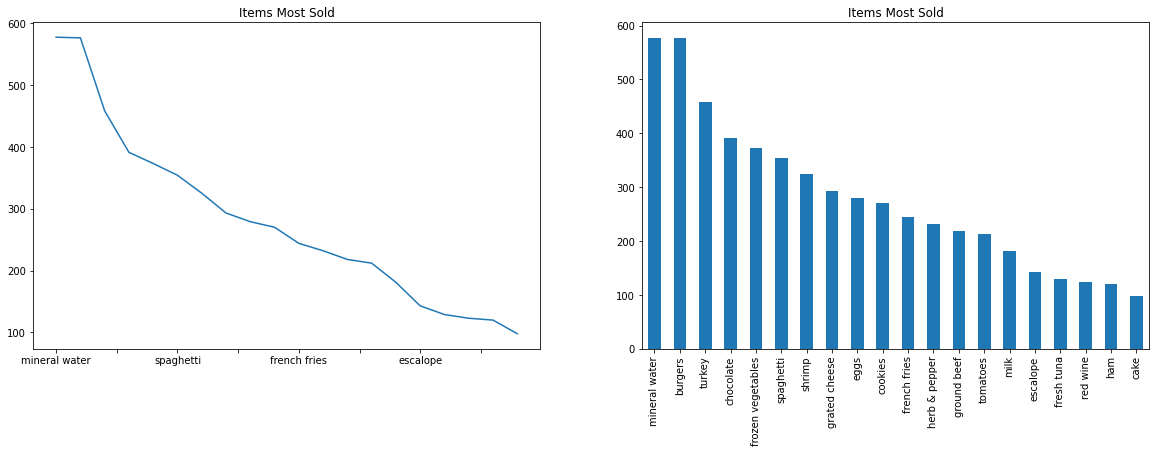

In [ ]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

In [ ]:
print(df[0].nunique())

115


# Market Basket Analysis

In [ ]:
# menggunakan fungsi aprori untuk menentukan minimal support, confidence, lift, dan leght
rules = apriori(transactions, min_support=0.003, min_confidance=0.2, min_lift=3, min_length=2)


In [ ]:
#menentukan rule
rules

<generator object apriori at 0x7fab102eab50>

In [ ]:
# semua rule dirubah menjadi list
Results = list(rules)
Results

[RelationRecord(items=frozenset({'cottage cheese', 'brownies'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)]),
 RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'light cream'}), confidence=0.07555555555555556, lift=4.843950617283951), OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}),

In [ ]:
# mengubah result menjadi dataframe.
df_results = pd.DataFrame(Results)

In [ ]:
# melihat result
df_results.head()

,items,support,ordered_statistics
0,"(cottage cheese, brownies)",0.003466,"[((brownies), (cottage cheese), 0.102766798418..."
1,"(chicken, light cream)",0.004533,"[((chicken), (light cream), 0.0755555555555555..."
2,"(mushroom cream sauce, escalope)",0.005733,"[((escalope), (mushroom cream sauce), 0.072268..."
3,"(pasta, escalope)",0.005866,"[((escalope), (pasta), 0.07394957983193277, 4...."
4,"(fresh bread, tomato juice)",0.004266,"[((fresh bread), (tomato juice), 0.09907120743..."


In [ ]:
# meletakkan nilai support pada data frame terpisah
support = df_results.support

In [ ]:
'''
convert orderstatistic in a proper format.
order statistic has lhs => rhs as well rhs => lhs 
we can choose any one for convience.
Let's choose first one which is 'df_results['ordered_statistics'][i][0]'
''' 

#all four empty list which will contain lhs, rhs, confidance and lift respectively.
first_values = []
second_values = []
third_values = []
fourth_value = []

# loop number of rows time and append 1 by 1 value in a separate list.. 
# first and second element was frozenset which need to be converted in list..
for i in range(df_results.shape[0]):
    single_list = df_results['ordered_statistics'][i][0]
    first_values.append(list(single_list[0]))
    second_values.append(list(single_list[1]))
    third_values.append(single_list[2])
    fourth_value.append(single_list[3])

In [ ]:
# convert all four list into dataframe for further operation..
lhs = pd.DataFrame(first_values)
rhs = pd.DataFrame(second_values)

confidance=pd.DataFrame(third_values,columns=['Confidance'])

lift=pd.DataFrame(fourth_value,columns=['lift'])

In [ ]:
# concat all list together in a single dataframe
df_final = pd.concat([lhs,rhs,support,confidance,lift], axis=1)
df_final

,0,1,0,1,2,support,Confidance,lift
0,brownies,None,cottage cheese,None,None,0.003466,0.102767,3.225330
1,chicken,None,light cream,None,None,0.004533,0.075556,4.843951
2,escalope,None,mushroom cream sauce,None,None,0.005733,0.072269,3.790833
3,escalope,None,pasta,None,None,0.005866,0.073950,4.700812
4,fresh bread,None,tomato juice,None,None,0.004266,0.099071,3.259356
...,...,...,...,...,...,...,...,...
89,ground beef,pancakes,mineral water,spaghetti,None,0.003066,0.211009,3.532991
90,ground beef,None,mineral water,spaghetti,tomatoes,0.003066,0.031208,3.344117
91,olive oil,None,mineral water,spaghetti,milk,0.003333,0.050607,3.216994
92,mineral water,milk,shrimp,spaghetti,None,0.003066,0.063889,3.014029


In [ ]:
'''
 we have some of place only 1 item in lhs and some place 3 or more so we need to a proper represenation for User to understand. 
 replacing none with ' ' and combining three column's in 1 
 example : coffee,none,none is converted to coffee, ,
'''
df_final.fillna(value=' ', inplace=True)
df_final.head()

,0,1,0,1,2,support,Confidance,lift
0,brownies,,cottage cheese,,,0.003466,0.102767,3.225330
1,chicken,,light cream,,,0.004533,0.075556,4.843951
2,escalope,,mushroom cream sauce,,,0.005733,0.072269,3.790833
3,escalope,,pasta,,,0.005866,0.073950,4.700812
4,fresh bread,,tomato juice,,,0.004266,0.099071,3.259356


In [ ]:
#set column name
df_final.columns = ['lhs',1,'rhs',2,3,'support','confidance','lift']
df_final.head()

,lhs,1,rhs,2,3,support,confidance,lift
0,brownies,,cottage cheese,,,0.003466,0.102767,3.225330
1,chicken,,light cream,,,0.004533,0.075556,4.843951
2,escalope,,mushroom cream sauce,,,0.005733,0.072269,3.790833
3,escalope,,pasta,,,0.005866,0.073950,4.700812
4,fresh bread,,tomato juice,,,0.004266,0.099071,3.259356


In [ ]:
# add both the columns to lhs itemset only
df_final['lhs'] = df_final['lhs'] + str(", ") + df_final[1]

# add all three column to rhs itemset only
df_final['rhs'] = df_final['rhs']+str(", ")+df_final[2] + str(", ") + df_final[3]

In [ ]:
df_final.head()

,lhs,1,rhs,2,3,support,confidance,lift
0,"brownies,",,"cottage cheese, ,",,,0.003466,0.102767,3.225330
1,"chicken,",,"light cream, ,",,,0.004533,0.075556,4.843951
2,"escalope,",,"mushroom cream sauce, ,",,,0.005733,0.072269,3.790833
3,"escalope,",,"pasta, ,",,,0.005866,0.073950,4.700812
4,"fresh bread,",,"tomato juice, ,",,,0.004266,0.099071,3.259356


In [ ]:
#drop columns 1,2 and 3 because now we already appended to lhs column.

df_final.drop(columns=[1,2,3],inplace=True)

In [ ]:
#this is final output. You can sort based on the support lift and confidance..
df_final.head()

,lhs,rhs,support,confidance,lift
0,"brownies,","cottage cheese, ,",0.003466,0.102767,3.225330
1,"chicken,","light cream, ,",0.004533,0.075556,4.843951
2,"escalope,","mushroom cream sauce, ,",0.005733,0.072269,3.790833
3,"escalope,","pasta, ,",0.005866,0.073950,4.700812
4,"fresh bread,","tomato juice, ,",0.004266,0.099071,3.259356


In [ ]:
# Showing top 10 items, based on lift.  Sorting in desc order
df_final.sort_values('lift', ascending=False).head(10)

,lhs,rhs,support,confidance,lift
58,"olive oil,","mineral water, whole wheat pasta,",0.003866,0.058704,6.115863
6,"fromage blanc,","honey, ,",0.003333,0.245098,5.164271
49,"ground beef,","tomato sauce, spaghetti,",0.003066,0.031208,4.980600
1,"chicken,","light cream, ,",0.004533,0.075556,4.843951
3,"escalope,","pasta, ,",0.005866,0.073950,4.700812
28,"ground beef,","french fries, herb & pepper,",0.003200,0.032564,4.697422
11,"pasta,","shrimp, ,",0.005066,0.322034,4.506672
23,"ground beef,","chocolate, herb & pepper,",0.003999,0.040706,4.490183
69,"frozen vegetables,","mineral water, chocolate, shrimp",0.003200,0.033566,4.417225
10,"olive oil,","whole wheat pasta, ,",0.007999,0.121457,4.122410


**Analisis**

Output market basket analisis menghasilkan menghasilkan 10 item dengan nilai lift terbesar seperti diatas.
- olive oil==>mineral water dan whole wheat 

Pada transaksi gabungan olive oil terhadap mineral water dan whole wheat pasta menunjukkan nilai support sebesar 0,3% menunjukkan terdapat 0,3% kemungkinan transaksi gabungan antara olive oil mineral water adan whole wheat pasta terhadap keseluruhan transaksi. Nilai confident yang bernilai 5% menunjukkan seorang konsumen yang membeli olive oil memiliki kemungkinan untuk membeli mineral water dan whole wheat pasta sebesar 5%. Gabungann olive oil terhadap mineral water dan whole wheat pasta memiliki nilai lift terbesar sebesar 6,12 menunjukkan bahwa kedua transaksi tersebut memiliki korelasi positif yang kuat dengan kata lain dua item tersebut sering dibeli secara bersamaan.

- fromage blanc==>honey

Pada gabungan fromage blanc dan honey menunjukkan nilai support sebesar 0,3% menunjukkan ada 0,3% transaksi gabungan fromage blanc dan honey terhadap keseluruhan transaksi. Nilai confident yang bernilai 24% menunjukkan seorang konsumen yang membeli fromage blanc dan honey memiliki kemungkinan sebesar 24% untuk membeli honey. Gabungann transaksi fromage blanc dan honey memiliki nilai lift terbesar sebesar 5,16 menunjukkan bahwa kedua transaksi tersebut memiliki korelasi positif yang kuat dengan kata lain dua item tersebut sering dibeli secara bersamaan.

- ground beef==>tomato sauce, spaghetti
- chicken==>light cream
- escalope==>pasta
- ground beef==>herb & pepper, french fries
- pasta==>shrimp
- ground beef==>herb & pepper, chocolate
- frozen vegetables==>chocolate, mineral water, shrimp
- olive oil==>whole wheat pasta